Plots winrate of cyclic adversary against Leela Zero with Leela using varying visit counts.

In [1]:
import collections
import pathlib
import re

import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

import utils

plt.style.use(
    ["tableau-colorblind10", utils.get_style("default"), utils.get_style("1-col")]
)

In [2]:
game_datas = pathlib.Path(
    "/nas/ucb/ttseng/go_attack/transfer/leela-vis-sweep-230222/"
).glob("**/visits*/thread*/sgfs/game.dat")
game_datas_and_visits = []
visit_regex = re.compile("/visits(\d+)-")
for game_data in game_datas:
    visits_match = visit_regex.search(str(game_data))
    assert visits_match is not None
    visits = int(visits_match.group(1))
    game_datas_and_visits.append((game_data, visits))

game_datas = pathlib.Path(
    "/nas/ucb/ttseng/go_attack/transfer/s545mil-vs-elf-leela-20230119/katago-vs-leela"
).glob("**/thread*/sgfs/game.dat")
game_datas_and_visits += [(game_data, 40000) for game_data in game_datas]

In [3]:
# Key = Leela visits, value = number of adversary wins
adv_wins_by_visits = collections.Counter()
# Key = Leela visits, value = number of games
games_by_visits = collections.Counter()
for game_data, visits in game_datas_and_visits:
    with open(game_data) as f:
        for line in f:
            adv_win = "W+" in line
            leela_win = "B+" in line
            if not adv_win and not leela_win:
                continue
            assert adv_win != leela_win

            games_by_visits[visits] += 1
            if adv_win:
                adv_wins_by_visits[visits] += 1

### Load libraries

### Parse data

visits=1 adv_wins=2 num_games=1200
visits=64 adv_wins=30 num_games=1200
visits=256 adv_wins=22 num_games=1200
visits=1600 adv_wins=15 num_games=1200
visits=2500 adv_wins=11 num_games=1000
visits=3600 adv_wins=14 num_games=1000
visits=4900 adv_wins=20 num_games=1000
visits=6400 adv_wins=14 num_games=1000
visits=8000 adv_wins=24 num_games=1000
visits=16000 adv_wins=14 num_games=400
visits=25000 adv_wins=20 num_games=351
visits=32000 adv_wins=27 num_games=390
visits=40000 adv_wins=17 num_games=317
visits=80000 adv_wins=10 num_games=103
visits=160000 adv_wins=5 num_games=52


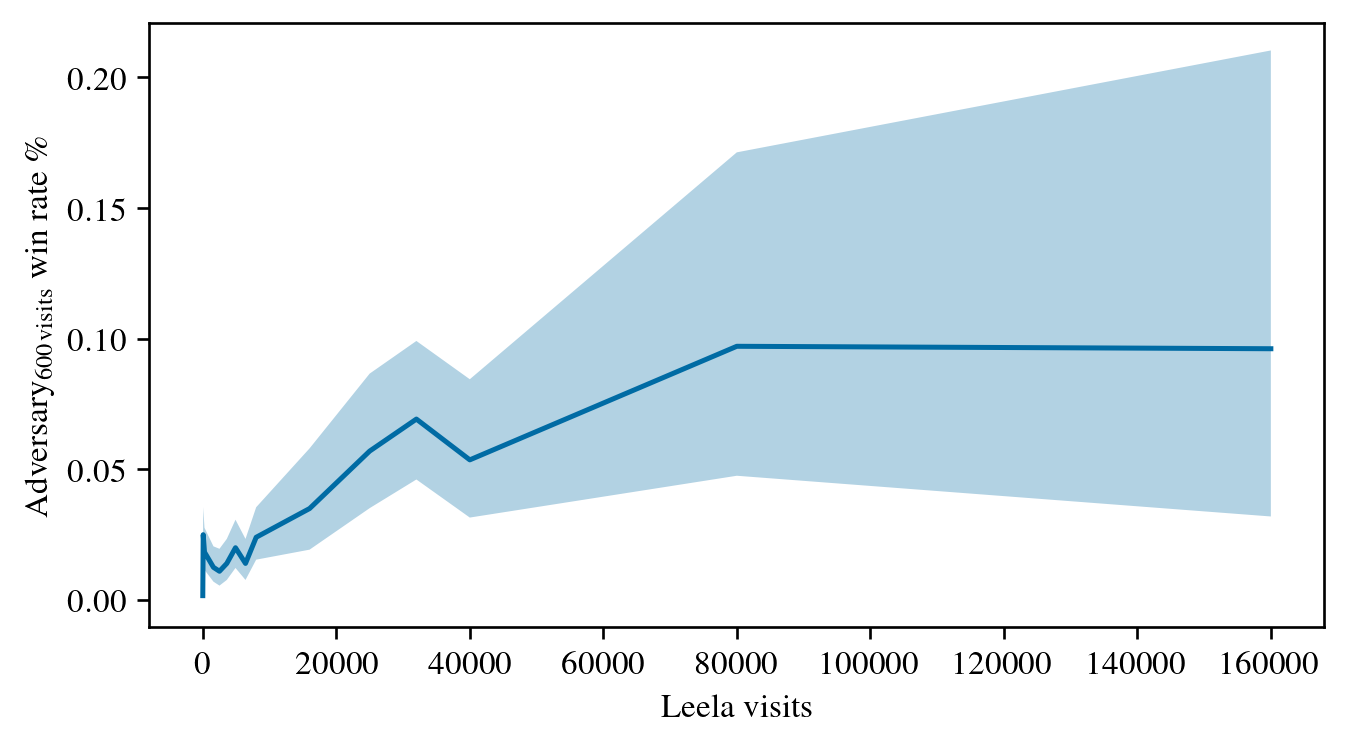

In [4]:
ALPHA = 0.05

visitss = sorted(games_by_visits.keys())
win_rates = []
for visits in visitss:
    adv_wins = adv_wins_by_visits[visits]
    num_games = games_by_visits[visits]
    print(f"{visits=} {adv_wins=} {num_games=}")
    win_rates.append(adv_wins / num_games)

plt.plot(visitss, win_rates)

# Clopper-Pearson confidence intervals
cis = [
    proportion_confint(
        adv_wins_by_visits[visits], games_by_visits[visits], alpha=ALPHA, method="beta"
    )
    for visits in visitss
]
plt.fill_between(
    visitss,
    [lower for lower, _ in cis],
    [upper for _, upper in cis],
    alpha=0.3,
    # color=colors[i],
    edgecolor="none",
)

plt.ylabel(r"Adversary$_\mathrm{600\,visits}$ win rate \%")
plt.xlabel("Leela visits")
plt.show()